<a href="https://colab.research.google.com/github/EnzoMoraes-full/Beginner-Python-Challengess/blob/main/PCA_PI_Blocos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matriz de Covariância:
[[3.17880272e-31 9.48354469e-32 1.41934372e-27 3.95555502e-16]
 [9.48354469e-32 1.09676176e-31 1.54227909e-27 3.95124767e-16]
 [1.41934372e-27 1.54227909e-27 4.51297928e-23 8.65128189e-12]
 [3.95555502e-16 3.95124767e-16 8.65128189e-12 3.44277840e+00]]

Autovalores:
[3.17880272e-31 3.44277840e+00 7.11510553e-32 2.33901774e-23]

Autovetores:
[[ 1.00000000e+00  1.14894267e-16  2.07521038e-01  1.81854558e-05]
 [ 0.00000000e+00 -1.64929943e-16 -9.78230555e-01  4.23564639e-05]
 [ 0.00000000e+00  2.51287794e-12  4.87863506e-06  9.99999999e-01]
 [ 0.00000000e+00  1.00000000e+00  3.49281951e-18 -2.51287796e-12]]

Dois maiores autovalores:
(3.4427784033242763, 2.3390177404774287e-23)

Dois maiores autovetores:
(array([ 1.14894267e-16, -1.64929943e-16,  2.51287794e-12,  1.00000000e+00]), array([ 1.81854558e-05,  4.23564639e-05,  9.99999999e-01, -2.51287796e-12]))


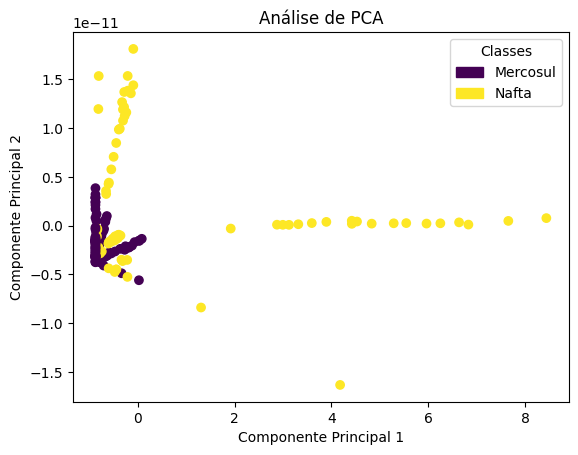

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import LabelEncoder

# Carrega o dataset
dataset = pd.read_csv('DatasetPCAblocos/PCAecoBlocos.csv')

# Muda de string para float
for column in dataset.columns[1:]:
    dataset[column] = dataset[column].str.replace(',', '').astype(float)

# Cria um dataframe
data = pd.DataFrame(data=dataset)
data['target'] = dataset.Blocos[dataset.index]

# Separa os números dos rótulos
y = data['target'].values
X = data.iloc[:, 1:5].values
#print(X)
#print(y)
'''
Tratar valores ausentes
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

'''
# Normalizar os dados
X = (X - np.mean(X)) / np.std(X)

# Calcular e imprimir a matriz de covariância
cov_matrix = np.cov(X.T)
print("Matriz de Covariância:")
print(cov_matrix)

# Calcular e imprimir os autovalores e autovetores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nAutovalores:")
print(eigenvalues)
print("\nAutovetores:")
print(eigenvectors)

# Ordenar os autovalores e autovetores em ordem decrescente
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Selecionar os dois maiores autovalores e autovetores
top_eigenvalues = eigen_pairs[0][0], eigen_pairs[1][0]
top_eigenvectors = eigen_pairs[0][1], eigen_pairs[1][1]

print("\nDois maiores autovalores:")
print(top_eigenvalues)
print("\nDois maiores autovetores:")
print(top_eigenvectors)

# Aplica o PCA com 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Converte os rótulos para valores numéricos
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

# Obtem cores únicas para cada classe
num_classes = len(np.unique(y))
colors = plt.cm.viridis(np.linspace(0, 1, num_classes))

# Cria um mapeamento de classe para cor
class_color_map = {class_label: color for class_label, color in zip(np.unique(y), colors)}

# Visualiza os resultados
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='viridis')

# Adiciona legendas para as classes
legend_handles = [Patch(color=class_color_map[label], label=label) for label in np.unique(y)]

plt.legend(handles=legend_handles, title="Classes")

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de PCA')
plt.show()